## Importing Libraries

In [1]:
'''import supporting libraries'''

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('./code/') # add path to source code directory

## Applying Climate Constraints - Rainfed

In [2]:
'''importing library'''

import ClimaticConstraints
clim_cons = ClimaticConstraints.ClimaticConstraints()

In [3]:
'''reading data'''

lgp_equv = np.load('./sample_data/input/LGPEquivalent.npy');
yield_map_rain = np.load('./sample_data/input/CropSuitability_rain.npy');

In [4]:
'''applying climate constraints'''

yield_map_rain1 = clim_cons.applyClimaticConstraints(lgp_equv, yield_map_rain, 'R') # I: Irrigated, R: Rain-fed

In [5]:
'''visualize result'''

plt.imshow(yield_map_rain1)
plt.colorbar()
plt.show()

## Applying Soil Constraints - Rainfed

In [6]:
'''importing library'''

import SoilConstraints
soil_cons = SoilConstraints.SoilConstraints()

In [7]:
'''reading data'''

soil_map = np.load('./sample_data/input/Lao_Soil.npy');

In [8]:
'''applying soil constraints'''

soil_cons.calculateSoilQualities('R') # I: Irrigated, R: Rain-fed
soil_cons.calculateSoilRatings('I') # L: Low, I: Intermediate, H: High input

yield_map_rain2 = soil_cons.applySoilConstraints(soil_map, yield_map_rain1)

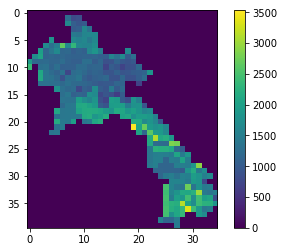

In [9]:
'''visualize result'''

plt.imshow(yield_map_rain2)
plt.colorbar()
plt.show()

## Applying Terrain Constraints - Rainfed

In [10]:
'''importing library'''

import TerrainConstraints
terrain_cons = TerrainConstraints.TerrainConstraints()

In [11]:
'''reading data'''

precipitation = np.load('./sample_data/input/precipitation.npy') # mm / day
slope_map = np.load('./sample_data/input/LAO_Slope.npy'); # Percentage Slope

In [12]:
'''applying Terrain constraints'''

terrain_cons.setClimateTerrainData(precipitation, slope_map)
terrain_cons.calculateFI()

yield_map_rain3 = terrain_cons.applyTerrainConstraints(yield_map_rain2, 'R') # I: Irrigated, R: Rain-fed

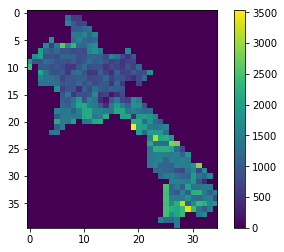

In [13]:
'''visualize result'''

plt.imshow(yield_map_rain3)
plt.colorbar()
plt.show()

## Exercise

Edit above sets of codes to perform yield reduction for irrigated consition.

## Additional Stuff

We can use UtilitiesCalc to perform utility functions such as classifying final yield, saving data, etc.

In [20]:
'''importing library'''

import UtilitiesCalc
obj_util = UtilitiesCalc.UtilitiesCalc()

In [21]:
'''Classifying final yield'''

yield_map_rain3_class = obj_util.classifyFinalYield(yield_map_rain3)

In [22]:
'''visualize result'''

plt.imshow(yield_map_rain3_class)
plt.colorbar()
plt.show()

In [23]:
'''finally saving raster file'''

obj_util.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/final_yield_rain.tif', yield_map_rain3)